In [ ]:
import pandas as pd
dataset = pd.read_csv('/content/sample_data/tear.csv', encoding='UTF-8')
dataset = dataset.sample(frac=1)

#Show the dataset information 
dataset.info()
dataset.isnull()
print(dataset.shape)
dataset



<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 3104 to 6887
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   instagram_comments    7000 non-null   object
 1   offensive_language    7000 non-null   int64 
 2   offensiveness_levels  7000 non-null   int64 
 3   hate_speech           7000 non-null   object
dtypes: int64(2), object(2)
memory usage: 273.4+ KB
(7000, 4)


,instagram_comments,offensive_language,offensiveness_levels,hate_speech
3104,T R A I D O R A ! Ponto final !,1,1,-1
578,Ridículos 🤮🤮🤮🤮🤮🤮,1,2,-1
676,Quando vamos ficar livre do STF mesmo?,1,1,-1
1454,Não gostei do teatrinho dela.,1,3,-1
5351,"Deixa ver se entendi...se 1/4 está pessimista,...",0,0,0
...,...,...,...,...
6987,Estão usando essa menina como escudo. Nada pod...,0,0,0
4951,"Amém Jesus, isso que a palavra do Deus dessas ...",0,0,0
655,OLHA AI QUEM CENSURA????? A ESQUERDA E OS VELH...,1,3,5
3567,Comemorando a invasao da Polonia pelos nazista...,0,0,0


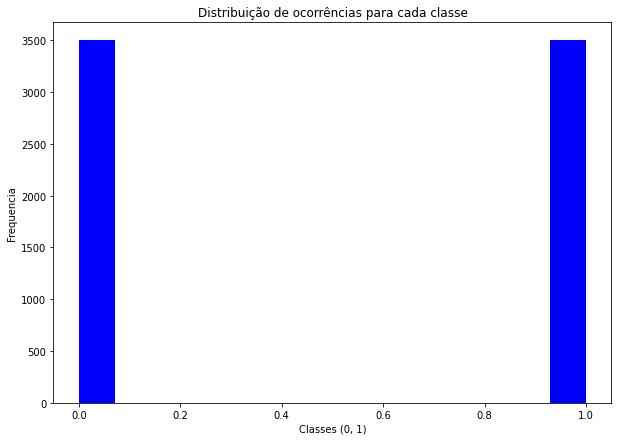

1    3500
0    3500
Name: classe, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7)) 
x = df_dataset ['classe'] 
plt.hist(x, bins = 'auto', color = "blue") 
plt.title('Distribuição de ocorrências para cada classe')
plt.ylabel('Frequencia')
plt.xlabel('Classes (0, 1)')
plt.show()
#-----------------------------------------------------------
df_dataset ['classe'].value_counts()

In [ ]:
#undersampling - deleting samples from the majority class
classe_0 = df_dataset [df_dataset .classe == 0]
classe_1 = df_dataset [df_dataset .classe == 1]
#classe_2 = df_dataset [df_dataset .classe == -1]


#Obtaining the less representative sample
sample_0 = classe_0.sample(n=336, replace=True)
#sample_1 = classe_2.sample(n=336, replace=True)

#Concatenating new data with LESS representativeness into the initial dataset.
dataset_undersampling = pd.concat([classe_1, sample_0])

print(dataset_undersampling['classe'].value_counts())


1.0    336
0.0    336
Name: classe, dtype: int64


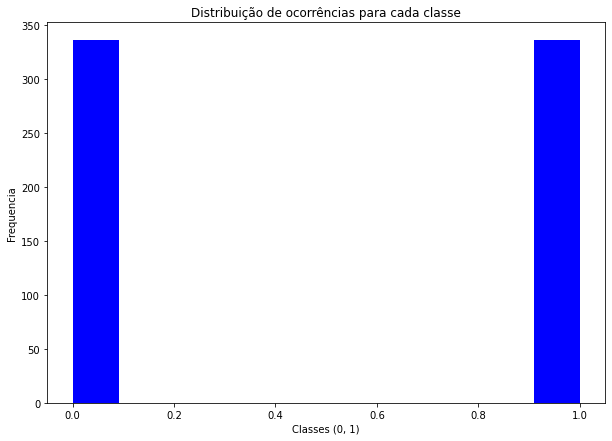

1.0    336
0.0    336
Name: classe, dtype: int64

In [ ]:
#Balanced dataset
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 7)) 
x = dataset_undersampling ['classe'] 
plt.hist(x, bins = 'auto', color = "blue") 
plt.title('Distribuição de ocorrências para cada classe')
plt.ylabel('Frequencia')
plt.xlabel('Classes (0, 1)')
plt.show()

dataset_undersampling ['classe'].value_counts()

In [ ]:
!pip install ktrain
import keras
import ktrain
from ktrain import text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 57.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 63.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.4/265.4 KB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 52.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 KB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━

In [ ]:
#fasttext
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(df_dataset, 
                                                                   'instagram_comments',
                                                                   label_columns='classe',
                                                                   maxlen=64, 
                                                                   max_features=1000,
                                                                   preprocess_mode='standard',
                                                                   lang=None,
                                                                   ngram_range=1,
                                                                   val_pct = 0.1,
                                                                   )

['not_classe', 'classe']
      not_classe  classe
5585         1.0     0.0
1774         0.0     1.0
4969         1.0     0.0
5136         1.0     0.0
4693         1.0     0.0
['not_classe', 'classe']
      not_classe  classe
3973         1.0     0.0
4135         1.0     0.0
6651         1.0     0.0
1592         0.0     1.0
127          0.0     1.0
language: pt
Word Counts: 10760
Nrows: 6300
6300 train sequences
train sequence lengths:
	mean : 9
	95percentile : 29
	99percentile : 53
Adding 3-gram features
max_features changed to 63193 with addition of ngrams
Average train sequence length with ngrams: 23
train (w/ngrams) sequence lengths:
	mean : 24
	95percentile : 84
	99percentile : 156
x_train shape: (6300,64)
y_train shape: (6300, 2)
Is Multi-Label? False
700 test sequences
test sequence lengths:
	mean : 9
	95percentile : 27
	99percentile : 58
Average test sequence length with ngrams: 15
test (w/ngrams) sequence lengths:
	mean : 15
	95percentile : 53
	99percentile : 111
x_test shape: 

In [ ]:
#fasttext classifier
model = text.text_classifier('fasttext', (x_train, y_train) , preproc=preproc)
classifier = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test)
                             )

Is Multi-Label? False
compiling word ID features...
maxlen is 64
done.


In [ ]:
#fasttext classifier
classifier.fit_onecycle(0.01,5)



begin training using onecycle policy with max lr of 0.01...
Epoch 1/5
197/197 [==============================] - 13s 61ms/step - loss: 0.6102 - accuracy: 0.6754 - val_loss: 0.5597 - val_accuracy: 0.7657
Epoch 2/5
197/197 [==============================] - 10s 50ms/step - loss: 0.3966 - accuracy: 0.8175 - val_loss: 0.4233 - val_accuracy: 0.8029
Epoch 3/5
197/197 [==============================] - 11s 57ms/step - loss: 0.3185 - accuracy: 0.8644 - val_loss: 0.4242 - val_accuracy: 0.7914
Epoch 4/5
197/197 [==============================] - 11s 58ms/step - loss: 0.2261 - accuracy: 0.9024 - val_loss: 0.4617 - val_accuracy: 0.7971
Epoch 5/5
197/197 [==============================] - 12s 60ms/step - loss: 0.1519 - accuracy: 0.9294 - val_loss: 0.4930 - val_accuracy: 0.7971


In [ ]:
classifier.validate()

22/22 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       365
           1       0.80      0.77      0.78       335

    accuracy                           0.80       700
   macro avg       0.80      0.80      0.80       700
weighted avg       0.80      0.80      0.80       700



array([[300,  65],
       [ 77, 258]])

In [ ]:
df_predited = classifier.predict()


22/22 [==============================] - 0s 4ms/step


In [ ]:
#bert
(x_train, y_train), (x_test, y_test), preproc = text.texts_from_df(df_dataset, 
                                                                   'instagram_comments',
                                                                   label_columns='classe',
                                                                   maxlen=64, 
                                                                   max_features=100,
                                                                   preprocess_mode='bert',
                                                                   lang='pt',
                                                                   val_pct = 0.1,
                                                                   )

['not_classe', 'classe']
      not_classe  classe
5843         1.0     0.0
3128         0.0     1.0
5561         1.0     0.0
547          0.0     1.0
1551         0.0     1.0
['not_classe', 'classe']
      not_classe  classe
901          0.0     1.0
2547         0.0     1.0
4308         1.0     0.0
3842         1.0     0.0
6424         1.0     0.0
preprocessing train...
language: pt


Is Multi-Label? False
preprocessing test...
language: pt


In [ ]:
#bert classifier
model = text.text_classifier('bert', (x_train, y_train) , preproc=preproc)
classifier = ktrain.get_learner(model, 
                             train_data=(x_train, y_train), 
                             val_data=(x_test, y_test),
                             batch_size=64
                             )

Is Multi-Label? False
maxlen is 64


/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


done.


In [ ]:
#Bert Classifier
classifier.fit_onecycle(0.00002,1)



begin training using onecycle policy with max lr of 2e-05...
99/99 [==============================] - 4919s 49s/step - loss: 0.5013 - accuracy: 0.7333 - val_loss: 0.3321 - val_accuracy: 0.8629


In [ ]:
import pickle
predictor = ktrain.get_predictor(classifier.model, preproc)
predictor.predict_filename('/home/francielle/Python/pt-tuplas.csv')

AttributeError: ignored

In [ ]:
#Pegar o modelo gerado pelo BERT
predictor = ktrain.get_predictor(classifier.model,preproc=preproc).save('model')
#predictor.save('model')

predictor = ktrain.load_predictor('model')
x = "Hello World"
prediction = predictor.model.predict(x)
print(prediction)

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


IndexError: ignored

In [ ]:
classifier.validate()

3/3 [==============================] - 19s 3s/step
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        35
           1       0.69      0.76      0.72        33

    accuracy                           0.72        68
   macro avg       0.72      0.72      0.72        68
weighted avg       0.72      0.72      0.72        68



array([[24, 11],
       [ 8, 25]])